In [1]:
from machinelearning.mlpipeline import MLPipelines
from machinelearning.featexpl import FeaturesExplanation
from machinelearning.explorexplain import ExploreExplain

import optuna
import pandas as pd
import numpy as np


# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from catboost import CatBoostClassifier

csv_dir = 'data/EPIC_norm_pos.txt'
# csv_dir = 'data/composite_dataset.csv'
label = 'group'


%load_ext autoreload
%autoreload 2


mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
mlpipe.normalize()
mlpipe.feature_selection(method='mrmr', num_features=200, inner_method='chi2')

mlpipe.X=mlpipe.X.fillna(0)

Label mapping: {0: 'Factor1:CASE', 1: 'Factor1:CONTROL'}
There is no selected classifier.


### Dynamic Parallel

In [2]:
fitted_mod, df = mlpipe.model_selection(optimizer='bayesian_search',n_trials_ncv=50,n_trials=50,rounds=5,score='matthews_corrcoef', return_best_model=True,plot='box',return_scores_df=True,choose_model=False,feature_selection_type='mrmr',outer_splits=3,inner_splits=3,hist_fit=True,parallel='dynamic_parallel')

Outer fold of 1 round:: 100%|██████████| 3/3 [00:00<00:00, 6232.25it/s]


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is

Finished with 1 round after 0.10 hours.


Outer fold of 2 round:: 100%|██████████| 3/3 [00:00<00:00, 4222.45it/s]


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
Finished with 2 round after 0.07 hours.


Outer fold of 3 round:: 100%|██████████| 3/3 [00:00<00:00, 4039.46it/s]


Finished with 3 round after 0.09 hours.


Outer fold of 4 round:: 100%|██████████| 3/3 [00:00<00:00, 3600.26it/s]


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
Finished with 4 round after 0.06 hours.


Outer fold of 5 round:: 100%|██████████| 3/3 [00:00<00:00, 4614.20it/s]


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


KeyboardInterrupt: 

### Freely Parallel

<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 4 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 5 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 3 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:01:59 ETA:   0:03:58
Outer fold of 4 round: 33% |████▎        | Elapsed Time: 0:02:34 ETA:   0:05:08
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:03:12 ETA:   0:06:25
Outer fold of 5 round: 33% |████▎        | Elapsed Time: 0:03:28 ETA:   0:06:56
Outer fold of 3 round: 33% |████▎        | Elapsed Time: 0:03:34 ETA:   0:07:08
Outer fold of 4 round: 66% |████████▋    | Elapsed Time: 0:06:19 ETA:   0:03:09
Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:06:36 ETA:   0:03:18
Outer fold of 4 round:100% |████████████

Finished with 4 round after 0.16 hours.


Outer fold of 5 round: 66% |████████▋    | Elapsed Time: 0:06:03 ETA:   0:03:01
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:06:37 Time:  0:06:37


Finished with 2 round after 0.16 hours.


Outer fold of 5 round:100% |█████████████| Elapsed Time: 0:06:04 Time:  0:06:04


Finished with 5 round after 0.16 hours.


Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:06:59 ETA:   0:03:29
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:07:00 Time:  0:07:00


Finished with 1 round after 0.17 hours.


Outer fold of 3 round: 66% |████████▋    | Elapsed Time: 0:06:36 ETA:   0:03:18
Outer fold of 3 round:100% |█████████████| Elapsed Time: 0:06:37 Time:  0:06:37


Finished with 3 round after 0.18 hours.
Finished with 12 estimators
No features were selected.


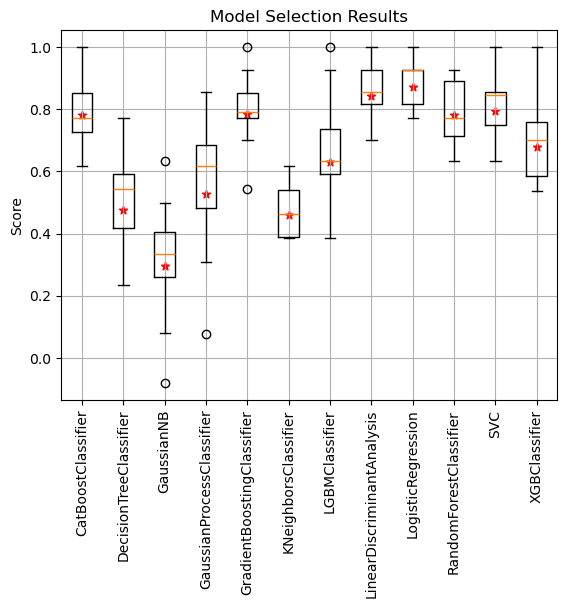

  0%|          | 0/50 [00:00<?, ?it/s]

/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.57617e-21): result may not be accurate.
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies

For the LogisticRegression model: 
Best parameters: {'penalty': 'l1', 'C': 8.966725995751977, 'solver_1': 'saga', 'max_iter': 692, 'fit_intercept': False}
Best matthews_corrcoef: 0.9527668414752787


In [5]:
fitted_mod, df = mlpipe.model_selection(optimizer='bayesian_search',n_trials_ncv=50,n_trials=50,rounds=5,score='matthews_corrcoef', return_best_model=True,plot='box',return_scores_df=True,choose_model=False,feature_selection_type='mrmr',outer_splits=3,inner_splits=3,hist_fit=True,parallel='freely_parallel')

### Thread per Round

<IPython.core.display.HTML object><IPython.core.display.HTML object>

<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 4 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 5 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 3 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 4 round: 33% |████▎        | Elapsed Time: 0:04:30 ETA:   0:09:01
Outer fold of 3 round: 33% |████▎        | Elapsed Time: 0:04:04 ETA:   0:08:08
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:02:51 ETA:   0:05:43
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:07:19 ETA:   0:14:39
Outer fold of 3 round: 66% |████████▋    | Elapsed Time: 0:07:02 ETA:   0:03:31
Outer fold of 3 round:100% |█████████████| Elapsed Time: 0:07:03 Time:  0:07:03


Finished with 3 round after 0.22 hours.


Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:06:05 ETA:   0:03:02
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:06:06 Time:  0:06:06


Finished with 1 round after 0.22 hours.


Outer fold of 4 round: 66% |████████▋    | Elapsed Time: 0:11:09 ETA:   0:05:34
Outer fold of 4 round:100% |█████████████| Elapsed Time: 0:11:10 Time:  0:11:10


Finished with 4 round after 0.25 hours.


Outer fold of 5 round: 33% |████▎        | Elapsed Time: 0:09:59 ETA:   0:19:58
Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:11:33 ETA:   0:05:46
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:11:34 Time:  0:11:34


Finished with 2 round after 0.26 hours.


Outer fold of 5 round: 66% |████████▋    | Elapsed Time: 0:14:59 ETA:   0:07:29


Finished with 5 round after 0.34 hours.
Finished with 12 estimators
No features were selected.


Outer fold of 5 round:100% |█████████████| Elapsed Time: 0:15:00 Time:  0:15:00


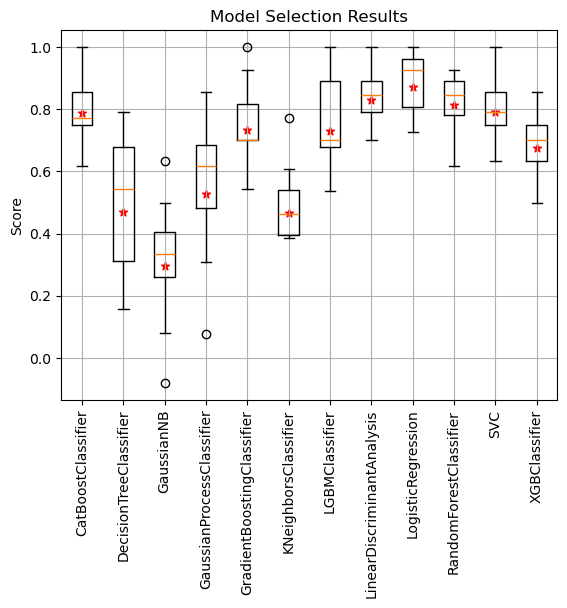

  0%|          | 0/50 [00:00<?, ?it/s]

/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.65742e-21): result may not be accurate.
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies

For the LogisticRegression model: 
Best parameters: {'penalty': 'l1', 'C': 8.678827562133373, 'solver_1': 'saga', 'max_iter': 642, 'fit_intercept': False}
Best matthews_corrcoef: 0.9527668414752787


In [6]:
fitted_mod, df = mlpipe.model_selection(optimizer='bayesian_search',n_trials_ncv=50,n_trials=50,rounds=5,score='matthews_corrcoef', return_best_model=True,plot='box',return_scores_df=True,choose_model=False,feature_selection_type='mrmr',outer_splits=3,inner_splits=3,hist_fit=True,parallel='thread_per_round')

### Results

| Method | Features | Outer | Inner | Rounds | Trials | Feature_selection | Device |**Time X Hours**|Coments|
|--------|----------|-------|-------|--------|--------|-------------------|--------|--------|----------|
|Dynamic|200|3|3|5|50|mrmr|laptop|0.22|pool(process=num_cores)|
|Dynamic|200|3|3|5|50|mrmr|laptop|paketo|pool(process=num_cores), optuna_multi|
|Dynamic|200|3|3|5|50|mrmr|laptop|paketo|pool(process=num_cores,maxtasksperchild=1), optuna_multi|
|Dynamic|200|3|3|5|50|mrmr|laptop|0.21|pool(maxtasksperchild=1)|
|Dynamic|200|3|3|5|50|mrmr|laptop|paketo|for loop for rounds, optuna_multi|
|Dynamic|200|3|3|5|50|mrmr|laptop|paketo|for loop for rounds with specified threads for numpy and to outer, optuna_multi|
|Dynamic|200|3|3|5|50|mrmr|laptop|paketo|for loop for rounds with specified threads for numpy and freee outer, optuna_multi|

|Freely|200|3|3|5|50|mrmr|laptop|0.18|No|
|ThrPerRound|200|3|3|5|50|mrmr|laptop|0.34|No|

